In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [6]:
df=pd.read_csv(r"C:\AI&ML\Fake News Dataset\train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

<AxesSubplot:>

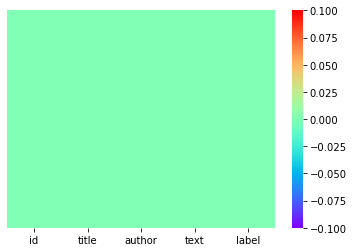

In [23]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='rainbow')

In [24]:
df.shape

(18285, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [26]:
df=df.dropna()

<AxesSubplot:>

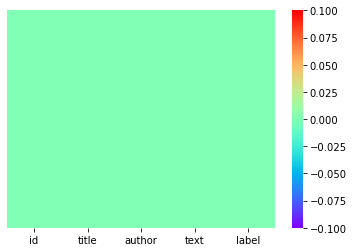

In [27]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='rainbow')

In [29]:
X=df.drop('label', axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [32]:
Y=df['label']
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [34]:
Y=df.iloc[:,-1:]
Y.head()

,label
0,1
1,0
2,1
3,1
4,1


In [35]:
import tensorflow as tf

In [37]:
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import LSTM
from keras.layers import Dense

In [38]:
voc_size=5000

In [39]:
msg=X.copy()

In [40]:
msg.reset_index(inplace=True)

In [41]:
X.head(10)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [42]:
msg.head(10)

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [43]:
import re
from nltk.corpus import stopwords

# Data Preprocessing

In [44]:
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
from nltk.stem.porter import PorterStemmer

In [47]:
ps=PorterStemmer()

In [49]:
corpus=[]
for i in range(0, len(msg)):
    x=re.sub('[^a-zA-Z]',' ', msg['title'][i])
    x=x.lower()
    x=x.split()
    x=[ps.stem(word) for word in x if not word in stopwords.words('English')]
    x=' '.join(x)
    corpus.append(x)

In [50]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [51]:
encoding=[one_hot(words, voc_size) for words in corpus]
encoding

[[967, 4573, 2905, 3232, 4675, 2552, 4846, 2415, 3955, 3129],
 [4619, 928, 2610, 2873, 2997, 3033, 69],
 [270, 1278, 50, 2724],
 [3894, 2310, 2136, 4155, 3881, 2393],
 [4730, 2997, 4329, 2399, 4221, 4295, 2997, 4039, 1130, 1362],
 [4278,
  391,
  1762,
  2690,
  4646,
  3175,
  1222,
  3393,
  1562,
  667,
  427,
  3612,
  2385,
  405,
  69],
 [1009, 1197, 1675, 1377, 409, 2292, 3477, 1727, 2720, 3701, 3145],
 [3521, 1361, 570, 891, 4967, 1866, 3175, 2631, 2720, 3701, 3145],
 [1238, 137, 2953, 2770, 711, 2553, 4190, 428, 3175, 3208],
 [2420, 4812, 2076, 1404, 2233, 2866, 2730, 1075],
 [4400, 4439, 2061, 667, 3112, 3729, 1169, 4610, 776, 1074, 383],
 [4155, 4372, 4675, 2553, 3175, 4967],
 [4434, 4233, 1346, 3790, 4333, 4965, 2562, 2153, 2136],
 [4124, 1530, 1388, 4364, 2039, 4937, 2071, 2720, 3701, 3145],
 [4936, 649, 4679, 327, 2987, 2720, 3701, 3145],
 [3088, 1965, 2091, 1027, 2291, 3437, 1894, 2570, 183, 1246],
 [609, 2891, 928],
 [3635, 3026, 3071, 1749, 3175, 468, 4702, 69],
 [4998

In [55]:
lenght=20
emb=pad_sequences(encoding, padding='pre', maxlen=lenght)
print(emb)

[[   0    0    0 ... 2415 3955 3129]
 [   0    0    0 ... 2997 3033   69]
 [   0    0    0 ... 1278   50 2724]
 ...
 [   0    0    0 ... 2720 3701 3145]
 [   0    0    0 ... 4475 3493 4743]
 [   0    0    0 ... 1119 4293 1855]]


In [56]:
emb[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 4619,  928, 2610, 2873, 2997, 3033,   69])

In [58]:
emb_feature=40
model=Sequential()
model.add(Embedding(voc_size, emb_feature, input_length=lenght))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [63]:
X_result=np.array(emb)
Y_result=np.array(Y)
print(X_result.shape, Y_result.shape)

(18285, 20) (18285, 1)


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, Y_train, Y_test=train_test_split(X_result, Y_result, test_size=0.33, random_state=42)

# Train

In [66]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=125, batch_size=32)

Epoch 1/125
383/383 [==============================] - 5s 9ms/step - loss: 0.2737 - accuracy: 0.8717 - val_loss: 0.1945 - val_accuracy: 0.9186
Epoch 2/125
383/383 [==============================] - 3s 8ms/step - loss: 0.1344 - accuracy: 0.9480 - val_loss: 0.2074 - val_accuracy: 0.9122
Epoch 3/125
383/383 [==============================] - 3s 8ms/step - loss: 0.0915 - accuracy: 0.9667 - val_loss: 0.2636 - val_accuracy: 0.8848
Epoch 4/125
383/383 [==============================] - 3s 8ms/step - loss: 0.0640 - accuracy: 0.9775 - val_loss: 0.2804 - val_accuracy: 0.9133
Epoch 5/125
383/383 [==============================] - 3s 9ms/step - loss: 0.0367 - accuracy: 0.9882 - val_loss: 0.3369 - val_accuracy: 0.9123
Epoch 6/125
383/383 [==============================] - 3s 9ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.3885 - val_accuracy: 0.9137
Epoch 7/125
383/383 [==============================] - 3s 9ms/step - loss: 0.0133 - accuracy: 0.9962 - val_loss: 0.4709 - val_accuracy: 0.9085

In [67]:
from keras.layers import Dropout

In [68]:
emb_feature=40
model=Sequential()
model.add(Embedding(voc_size, emb_feature, input_length=lenght))
model.add(LSTM(100))
model.add(Dropout(0.30))
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
X_result=np.array(emb)
Y_result=np.array(Y)
print(X_result.shape, Y_result.shape)

(18285, 20) (18285, 1)


In [71]:
X_train, X_test, Y_train, Y_test=train_test_split(X_result, Y_result, test_size=0.33, random_state=42)

In [72]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=125, batch_size=32)

Epoch 1/125
383/383 [==============================] - 5s 10ms/step - loss: 0.2769 - accuracy: 0.8692 - val_loss: 0.1903 - val_accuracy: 0.9208
Epoch 2/125
383/383 [==============================] - 3s 9ms/step - loss: 0.1357 - accuracy: 0.9477 - val_loss: 0.2023 - val_accuracy: 0.9170
Epoch 3/125
383/383 [==============================] - 3s 9ms/step - loss: 0.0951 - accuracy: 0.9636 - val_loss: 0.2294 - val_accuracy: 0.9160
Epoch 4/125
383/383 [==============================] - 3s 9ms/step - loss: 0.0731 - accuracy: 0.9730 - val_loss: 0.2630 - val_accuracy: 0.9085
Epoch 5/125
383/383 [==============================] - 3s 9ms/step - loss: 0.0505 - accuracy: 0.9833 - val_loss: 0.3051 - val_accuracy: 0.9037
Epoch 6/125
383/383 [==============================] - 3s 9ms/step - loss: 0.0324 - accuracy: 0.9893 - val_loss: 0.4703 - val_accuracy: 0.9089
Epoch 7/125
383/383 [==============================] - 4s 9ms/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.3823 - val_accuracy: 0.908